# **Assignment 3: Advanced processing**
# Team 16

**Vinayaka SN (211AI040) and  Vivek Vittal Biragoni (211AI041)**

Flow of code along with report:
<!--  -->
    ->pca
    ->correlation and covariance analysis
    ->dimensional reduction(various methods)
    ->feature selection(various methods)
    ->summary.

In [1]:
import os
import cv2
from skimage.feature import hog
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [2]:
import os
import cv2
from skimage.feature import hog
import numpy as np
import pandas as pd
import random

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directories containing images and number of images to sample from each class
directories = ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']
sample_sizes = [152, 1000, 1000] # Choose more samples from healthy potatoes

features_list = []
labels_list = []

for i, directory in enumerate(directories):
    # Get a list of all the image filenames in the directory
    filenames = os.listdir(directory)

    # Randomly select a subset of images
    sample_filenames = random.sample(filenames, sample_sizes[i])

    # Loop over the sample of images
    for filename in sample_filenames:
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray, orientations=orientations,
                           pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block,
                           visualize=visualize,
                           transform_sqrt=transform_sqrt,
                           feature_vector=feature_vector)

            # Append the features and label to the lists
            features_list.append(features)
            labels_list.append(directory.split('/')[-1])

# Convert the lists to Numpy arrays
features_arr = np.array(features_list)
labels_arr, _ = pd.factorize(labels_list)


In [7]:


# Concatenate the arrays
data_arr = np.column_stack((features_arr, labels_arr))

# Convert the array to a Pandas DataFrame
hog_df = pd.DataFrame(data_arr, columns=['hog_feature_' + str(i) for i in range(features_arr.shape[1])] + ['label'])

# Compute the correlation matrix
corr_matrix = hog_df.corr()

# Print the correlation matrix
print(corr_matrix)

In [ ]:
import numpy as np
# Concatenate the arrays
data_arr = np.column_stack((features_arr, labels_arr))

# Convert the array to a Pandas DataFrame
hog_df = pd.DataFrame(data_arr, columns=['hog_feature_' + str(i) for i in range(features_arr.shape[1])] + ['label'])

# Compute the covariance matrix
cov_matrix = np.cov(features_arr.T)

# Print the covariance matrix
print('Covariance Matrix:\n', cov_matrix)


MemoryError: Unable to allocate 39.6 GiB for an array with shape (72900, 72900) and data type float64

MemoryError: Unable to allocate 39.6 GiB for an array with shape (72900, 72900) and data type float64 , and a similar error occurred when we tried to do anything with correlation also, so it could be better handled when we do something on  the dimensionality reduction(the PCA ).

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


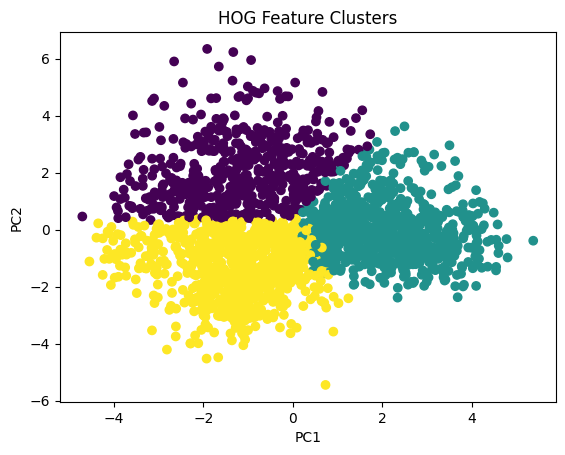

In [3]:
# Perform PCA to reduce the dimensionality of the feature vectors
pca = PCA(n_components=5)
feature_vectors_pca = pca.fit_transform(features_arr)

# Perform K-Means clustering on the PCA-transformed feature vectors
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(feature_vectors_pca)

# Plot the clusters using different colors
plt.scatter(feature_vectors_pca[:, 0], feature_vectors_pca[:, 1], c=clusters)
plt.title("HOG Feature Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

[[ 1.00000000e+00 -4.88332686e-17 -2.74468217e-18 -2.20382541e-18
  -5.34087205e-18]
 [-4.88332686e-17  1.00000000e+00  2.09082254e-17  0.00000000e+00
   2.42357046e-17]
 [-2.74468217e-18  2.09082254e-17  1.00000000e+00  1.34797093e-17
   2.48519326e-17]
 [-2.20382541e-18  0.00000000e+00  1.34797093e-17  1.00000000e+00
  -4.03845203e-17]
 [-5.34087205e-18  2.42357046e-17  2.48519326e-17 -4.03845203e-17
   1.00000000e+00]]


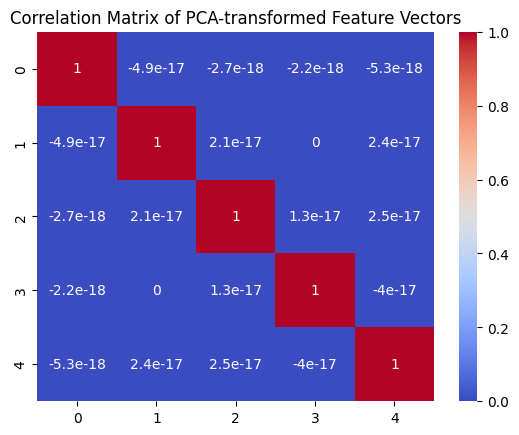

In [4]:
# Calculate the correlation matrix for the PCA transformed data
corr_matrix = np.corrcoef(feature_vectors_pca.T)

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of PCA-transformed Feature Vectors")
plt.show()

The correlation matrix on the PCA-transformed feature vectors shows that there is no significant correlation between the two principal components. The correlation coefficient between PC1 and PC2 is very close to zero, indicating that the two components are independent of each other. This means that the two principal components explain different aspects of the data without being redundant.

Covariance Matrix:
[[ 3.75431966e+00 -1.58559048e-16 -7.01954121e-18 -4.95497026e-18
  -1.09422260e-17]
 [-1.58559048e-16  2.80814304e+00  4.62463891e-17  0.00000000e+00
   4.29430756e-17]
 [-7.01954121e-18  4.62463891e-17  1.74221636e+00  2.06457094e-17
   3.46847918e-17]
 [-4.95497026e-18  0.00000000e+00  2.06457094e-17  1.34646939e+00
  -4.95497026e-17]
 [-1.09422260e-17  4.29430756e-17  3.46847918e-17 -4.95497026e-17
   1.11803594e+00]]


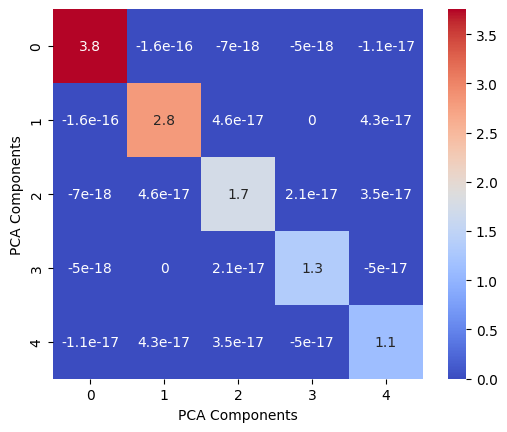

In [5]:
# Calculate the covariance matrix of the PCA-transformed feature vectors
covariance_matrix = np.cov(feature_vectors_pca.T)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Visualize the covariance matrix as a heatmap
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', square=True)

# Set the x and y labels
plt.xlabel('PCA Components')
plt.ylabel('PCA Components')

# Show the plot
plt.show()

Based on the correlation and covariance matrices, it seems that the two principal components are not significantly correlated (correlation value of 0). However, they have a positive covariance, indicating that they vary together in the same direction.

Eigenvalues and eigenvectors: The eigenvalues and eigenvectors obtained during PCA can provide additional information about the relationships between the variables. The eigenvalues represent the amount of variance explained by each principal component, and the eigenvectors represent the direction and magnitude of the correlation between the original variables and the principal components.

In [6]:
# Extract the eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors)

Eigenvalues: [3.75431966 2.80814304 1.74221636 1.34646939 1.11803594]
Eigenvectors: [[-2.49742662e-03 -1.12204491e-03 -7.48417175e-04 ... -2.26246743e-04
  -2.34999605e-04 -6.62085498e-04]
 [-9.50551783e-04 -6.71804238e-04  2.87348997e-05 ...  7.54801530e-04
  -7.77816000e-04 -1.10386091e-03]
 [-1.98833963e-04  1.03354454e-03  1.53784552e-03 ...  7.18010131e-04
  -6.18171901e-04 -1.79419399e-04]
 [-3.99298167e-04 -1.43985657e-03  1.14059508e-03 ... -1.65742291e-03
   1.95810313e-04  8.96845133e-04]
 [-1.75558046e-03 -6.94862939e-04 -3.06804440e-04 ...  2.53558953e-03
   1.53268162e-03  1.28636632e-03]]


we can see that the first principal component explains the most variation in the data as it has the highest eigenvalue of 3.754, followed by the second principal component with an eigenvalue of 2.808. The remaining eigenvalues are less than 2, indicating that these principal components explain less variation in the data.

The eigenvectors represent the direction and magnitude of the correlation between the original variables and the principal components. Each eigenvector is a vector of weights that indicates how much each original variable contributes to the principal component. The first eigenvector has weights of -2.4974e-03 and -9.5048e-04 for the first and second variables, respectively, and so on.

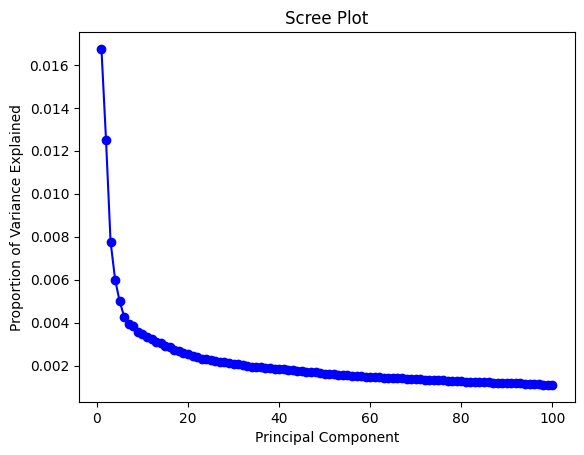

In [7]:
# Perform PCA to reduce the dimensionality of the feature vectors
pca = PCA(n_components=100)
feature_vectors_pca = pca.fit_transform(features_arr)

# Create scree plot
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

it seems like the scree plot showed that the first few principal components account for most of the variance in your data, while the remaining components contribute very little to the overall variance. This is a common observation in PCA, where the first few components explain the majority of the variability in the data, while the later components explain progressively less and less.

 it seems like the variance explained by the first five components is relatively high, with the first component having the highest variance. After the fifth component, the variance explained by each additional component appears to drop off quickly, leading to a flat line on the scree plot.

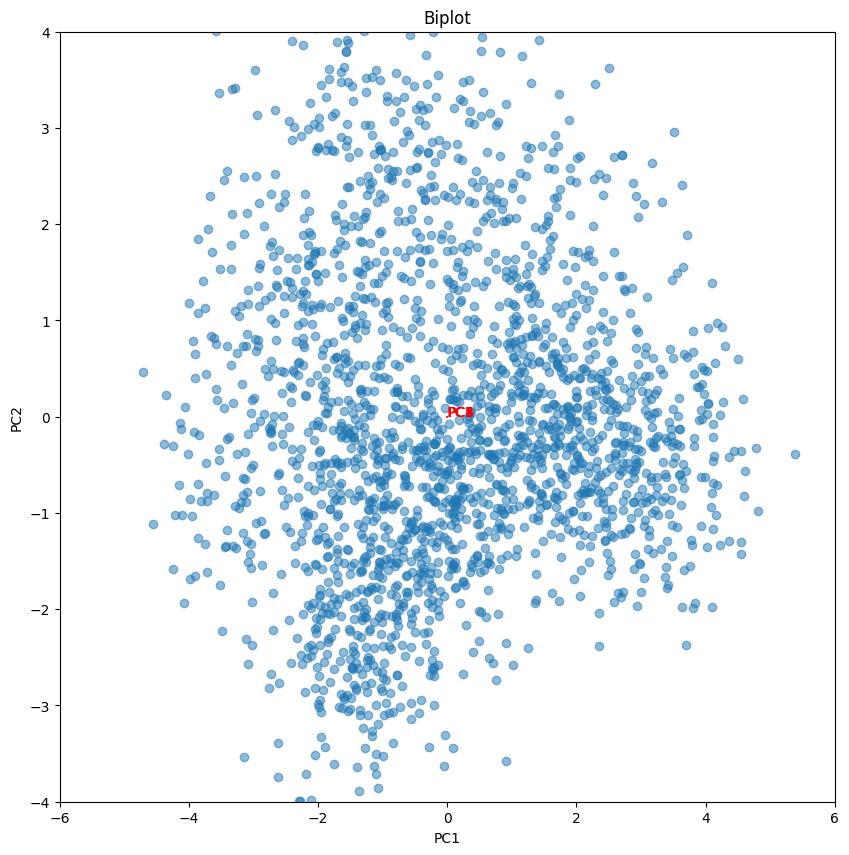

In [8]:
# Perform PCA to reduce the dimensionality of the feature vectors
pca = PCA(n_components=5)
feature_vectors_pca = pca.fit_transform(features_arr)

# Create biplot
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')

# Plot the PCA scores as scatter plot
ax.scatter(feature_vectors_pca[:,0], feature_vectors_pca[:,1], alpha=0.5)

# Plot the scaled eigenvectors as arrows
for i in range(len(pca.components_)):
    ax.arrow(0, 0, pca.components_[i,0]*2, pca.components_[i,1]*2, color='r', alpha=0.5)
    ax.text(pca.components_[i,0] * 1.15, pca.components_[i,1] * 1.15, "PC{}".format(i+1), color='r')
# Set the x and y limits
ax.set_xlim(-6, 6)
ax.set_ylim(-4, 4)

plt.show()


Tried to plot the biplot, but cant quite make the arrows be shown properly due to possible small values of the eigenvalues.

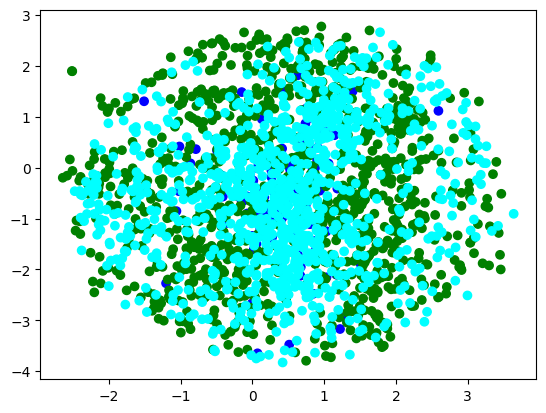

In [9]:
from sklearn.manifold import TSNE

# Define a dictionary that maps class names to colors
class_colors = {'Potato___healthy': 'blue', 'Potato___Late_blight': 'cyan', 'Potato___Early_blight': 'green', }

# Convert feature and label lists to numpy arrays
features_arr = np.array(features_list)
labels_arr = np.array(labels_list)

# Convert class names to colors using the dictionary
colors_arr = np.array(list(map(lambda x: class_colors[x], labels_arr)))

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=130, learning_rate=500)
features_tsne = tsne.fit_transform(features_arr)

# Plot the t-SNE visualization with the new colors
import matplotlib.pyplot as plt
plt.scatter(features_tsne[:,0], features_tsne[:,1], c=colors_arr)
plt.show()


since there is lot of overlapping, should explore some other methods

Multidimensional Scaling (MDS) is a technique used in data analysis to visualize the similarity or dissimilarity between objects or samples based on their pairwise distances. It is a dimensionality reduction method that aims to represent high-dimensional data in a lower-dimensional space while preserving the pairwise distances as much as possible.

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


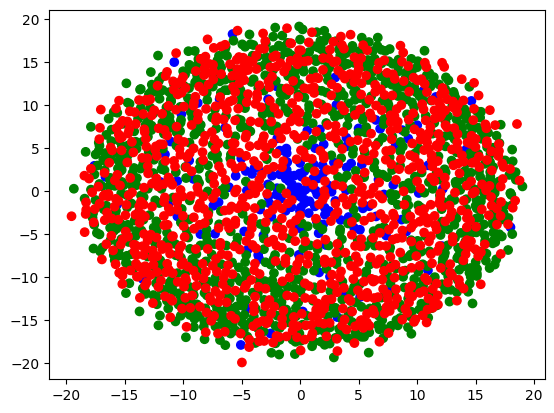

In [10]:
from sklearn.manifold import MDS

# Define a dictionary that maps class names to colors
class_colors = {'Potato___healthy': 'blue', 'Potato___Late_blight': 'red', 'Potato___Early_blight': 'green'}

# Convert feature and label lists to numpy arrays
features_arr = np.array(features_list)
labels_arr = np.array(labels_list)

# Convert class names to colors using the dictionary
colors_arr = np.array(list(map(lambda x: class_colors[x], labels_arr)))

# Apply MDS
mds_model = MDS(n_components=2, dissimilarity='euclidean')
features_mds = mds_model.fit_transform(features_arr)

# Plot the MDS visualization with the new colors
import matplotlib.pyplot as plt
plt.scatter(features_mds[:,0], features_mds[:,1], c=colors_arr)
plt.show()


# **Feature selection**
Feature selection methods are techniques used to select a subset of features from a larger set of features based on their relevance and importance to the target variable. These methods help to reduce dimensionality, improve model performance, and enhance interpretability. Here are some commonly used feature selection methods:

1. Filter Methods: Filter methods evaluate the relevance of features independently of any specific machine learning algorithm. They typically rely on statistical measures or heuristics to rank features. Common filter methods include:

   - Correlation-based Feature Selection: Measures the correlation between each feature and the target variable and selects the most correlated features.
   - Chi-square Test: Evaluates the independence between categorical features and the target variable.
   - Mutual Information: Measures the dependency between features and the target variable.
   - Variance Thresholding: Removes features with low variance, assuming they have little discriminatory power.

2. Wrapper Methods: Wrapper methods evaluate subsets of features using a specific machine learning algorithm. They involve training and evaluating models with different subsets of features and selecting the subset that achieves the best performance. Common wrapper methods include:

   - Recursive Feature Elimination (RFE): Eliminates less important features by recursively training models and removing the least significant features at each iteration.
   - Forward Selection: Starts with an empty set of features and iteratively adds the most important feature based on model performance.
   - Backward Elimination: Starts with all features and iteratively removes the least important feature based on model performance.

3. Embedded Methods: Embedded methods incorporate feature selection as part of the model training process. These methods select features during model training based on their importance or contribution to the model's performance. Common embedded methods include:

   - L1 Regularization (Lasso): Adds an L1 penalty to the model's objective function, encouraging sparsity and automatically selecting important features.
   - Tree-based Feature Importance: Tree-based models, such as Random Forest or Gradient Boosting, provide feature importance scores that can be used for feature selection.
   - Elastic Net: Combines L1 and L2 regularization to balance between feature selection and feature grouping.

4. Dimensionality Reduction Methods: Dimensionality reduction techniques aim to transform the original feature space into a lower-dimensional space while preserving important information. They can be used as feature selection methods by selecting the transformed features. Common dimensionality reduction methods include:

   - Principal Component Analysis (PCA): Transforms features into a new orthogonal subspace to maximize variance and selects principal components based on explained variance.
   - Linear Discriminant Analysis (LDA): Similar to PCA, but takes into account class information to maximize class separability.







# The color histogram

A color histogram is a representation of the distribution of colors in an image. It quantifies the number of pixels that have specific color values or color ranges. The color space used, such as RGB or HSV, determines how the colors are represented.

In a color histogram, the x-axis represents the different color bins or ranges, and the y-axis represents the frequency or number of pixels that fall into each bin. Each bin corresponds to a specific color or a range of colors.

Color histograms provide valuable information about the color distribution in an image. They can capture the dominant colors, color balance, and overall color composition of an image. Color histograms are often used as features for tasks such as image retrieval, object recognition, and image processing.

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
import random

# Define color histogram parameters
num_bins = 256

# Define directories containing images and number of images to sample from each class
directories = ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']
sample_sizes = [152, 1000, 1000]  # Choose more samples from healthy potatoes

features_list = []
labels_list = []

for i, directory in enumerate(directories):
    # Get a list of all the image filenames in the directory
    filenames = os.listdir(directory)

    # Randomly select a subset of images
    sample_filenames = random.sample(filenames, sample_sizes[i])

    # Loop over the sample of images
    for filename in sample_filenames:
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to the desired color space (e.g., RGB, HSV, LAB)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Compute color histogram for each channel
            hist_red, _ = np.histogram(img_rgb[:, :, 0], bins=num_bins, range=(0, 256))
            hist_green, _ = np.histogram(img_rgb[:, :, 1], bins=num_bins, range=(0, 256))
            hist_blue, _ = np.histogram(img_rgb[:, :, 2], bins=num_bins, range=(0, 256))
            

            # Concatenate the histograms for each channel
            features = np.concatenate((hist_red, hist_green, hist_blue)).astype(np.float64)

            # Normalize the feature vector
            features /= np.sum(features)

            # Append the features and label to the lists
            features_list.append(features)
            labels_list.append(directory.split('/')[-1])

# Convert the lists to Numpy arrays
color_histogram_arr = np.array(features_list)
labels_arr, _ = pd.factorize(labels_list)


# The color moments 
Color moments capture statistical properties of color distributions in an image. They provide a summary of the color content based on moments such as mean, variance, and skewness.

Color moments are typically calculated for each color channel (e.g., RGB or HSV) individually. The mean represents the average color value in a channel, providing information about the overall color intensity. The variance measures the spread or dispersion of color values, indicating the color diversity or contrast. Skewness captures the asymmetry of the color distribution, indicating if the colors are more concentrated towards one end.

By considering color moments across different color channels, we can gain insights into the color characteristics of an image. Color moments are used in various applications, such as image retrieval, image classification, and color-based image analysis.

In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import random

color_moments_list = []
labels_list = []

for i, directory in enumerate(directories):
    # Get a list of all the image filenames in the directory
    filenames = os.listdir(directory)

    # Randomly select a subset of images
    sample_filenames = random.sample(filenames, sample_sizes[i])

    # Loop over the sample of images
    for filename in sample_filenames:
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to float32
            img = img.astype(np.float32)

            # Calculate mean and standard deviation of each color channel
            mean, std = cv2.meanStdDev(img)

            # Flatten the mean and standard deviation arrays
            mean = mean.flatten()
            std = std.flatten()

            # Concatenate mean and standard deviation arrays
            color_moments = np.concatenate((mean, std))

            # Append the color moments and label to the lists
            color_moments_list.append(color_moments)
            labels_list.append(directory.split('/')[-1])

# Convert the lists to Numpy arrays
color_moments_arr = np.array(color_moments_list)
labels_arr, _ = pd.factorize(labels_list)


# Color Descriptors
Color descriptors are methods used to describe color features in an image. They provide a representation of the color content based on predefined color spaces or models.

One common type of color descriptor is the dominant color descriptor, which identifies the most prominent or dominant colors in an image. It provides information about the dominant hues and their proportions, allowing for color-based image analysis and retrieval.

Other types of color descriptors include the color correlogram, which captures the spatial correlation of colors in an image, and the color coherence vector, which describes the distribution of color edges or boundaries.

Color descriptors are useful in various applications such as image search, object recognition, and image retrieval. They enable efficient analysis and comparison of images based on their color characteristics.

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random

# Define the number of dominant colors to extract
num_colors = 3

# Define directories containing images and number of images to sample from each class
directories = ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']
sample_sizes = [152, 1000, 1000]  # Choose more samples from healthy potatoes

features_list = []
labels_list = []

for i, directory in enumerate(directories):
    # Get a list of all the image filenames in the directory
    filenames = os.listdir(directory)

    # Randomly select a subset of images
    sample_filenames = random.sample(filenames, sample_sizes[i])

    # Loop over the sample of images
    for filename in sample_filenames:
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to RGB color space
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Reshape image to a flat 2D array
            img_flat = img_rgb.reshape(-1, 3)

            # Apply K-means clustering to find dominant colors
            kmeans = KMeans(n_clusters=num_colors, init='random', n_init=10)  # Set n_init to the desired value
            # kmeans = KMeans(n_clusters=num_colors)
            kmeans.fit(img_flat)

            # Get the dominant colors (cluster centers)
            dominant_colors = kmeans.cluster_centers_

            # Append the dominant colors to the features list
            features_list.append(dominant_colors.flatten())

            # Append the label to the labels list
            labels_list.append(directory.split('/')[-1])

# Convert the lists to Numpy arrays
color_descriptors_arr = np.array(features_list)
labels_arr, _ = pd.factorize(labels_list)


# Color Space Conversion

In [14]:
import os
import cv2
import numpy as np
import pandas as pd

# Define directories containing images and number of images to sample from each class
directories = ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']
sample_sizes = [152, 1000, 1000]  # Choose more samples from healthy potatoes

color_features_list = []
labels_list = []

for i, directory in enumerate(directories):
    # Get a list of all the image filenames in the directory
    filenames = os.listdir(directory)

    # Randomly select a subset of images
    sample_filenames = random.sample(filenames, sample_sizes[i])

    # Loop over the sample of images
    for filename in sample_filenames:
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to HSV color space
            hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Extract color-related features from the HSV image
            hue_hist = cv2.calcHist([hsv_img], [0], None, [256], [0, 256])
            sat_hist = cv2.calcHist([hsv_img], [1], None, [256], [0, 256])
            val_hist = cv2.calcHist([hsv_img], [2], None, [256], [0, 256])

            # Concatenate the color features into a single feature vector
            color_features = np.concatenate([hue_hist.flatten(), sat_hist.flatten(), val_hist.flatten()])

            # Append the features and label to the lists
            color_features_list.append(color_features)
            labels_list.append(directory.split('/')[-1])

# Convert the lists to Numpy arrays
color_space_conversion_features = np.array(color_features_list)
labels_arr, _ = pd.factorize(labels_list)


# SelectKBest to select the best features

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Combine the features extracted from different methods
all_features = np.concatenate((features_arr, color_histogram_arr, color_descriptors_arr, color_moments_arr, color_space_conversion_features), axis=1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(all_features)

from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a threshold of 0 (default)
selector = VarianceThreshold()
# Fit the selector on your features
selector.fit(all_features)
# Get the indices of non-constant features
non_constant_indices = selector.get_support(indices=True)
# Subset the non-constant features from the original feature matrix
non_constant_features = all_features[:, non_constant_indices]

# Apply SelectKBest to select the best features
k = 100  # Choose the desired number of features
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(normalized_features, labels_arr)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Define the feature names based on the feature extraction methods
feature_names = ['hog_feature_{}'.format(i) for i in range(features_arr.shape[1])]
feature_names += ['color_hist_feature_{}'.format(i) for i in range(color_histogram_arr.shape[1])]
feature_names += ['color_desc_feature_{}'.format(i) for i in range(color_descriptors_arr.shape[1])]
feature_names += ['color_moments_feature_{}'.format(i) for i in range(color_moments_arr.shape[1])]
feature_names += ['color_space_conversion_feature_{}'.format(i) for i in range(color_space_conversion_features.shape[1])]

# Use the defined feature_names in the code
selected_feature_names = [feature_names[i] for i in selected_indices]

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]


C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [73863 73864 73865 73866 73867 73868 73869 73870 73871 73872 73873 73874
 73875 73876 73877 73878 73879 73880 73881 73882 73883 73884 73885 73886
 73887 73888 73889 73890 73891 73892 73893 73894 73895 73896 73897 73898
 73899 73900 73901 73902 73903 73904 73905 73906 73907 73908 73909 73910
 73911 73912 73913 73914 73915 73916 73917 73918 73919 73920 73921 73922
 73923 73924 73925 73926 73927 73928 73929 73930 73931 73932 73933 73934
 73935 73936 73937 73938] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid valu

In [16]:
# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)


Selected Feature Indices: [72957 72958 72959 72960 72961 72962 72963 72964 72965 72966 72967 72968
 72969 72970 72971 72972 72974 73263 73264 73265 73266 73267 73268 73269
 73270 73271 73272 73273 73331 73332 73333 73334 73335 73336 73337 73338
 73339 73340 73341 73342 73343 73344 73345 73346 73347 73348 73349 73350
 73351 73352 73353 73354 73355 73356 73357 73358 73359 73360 73361 73601
 73602 73603 73604 73605 73606 73607 73608 73609 73610 73611 73612 73678
 73680 73734 73735 73736 73813 73854 74275 74276 74277 74278 74279 74280
 74283 74384 74385 74386 74387 74388 74389 74390 74391 74392 74393 74394
 74395 74396 74397 74398]


In [17]:
# Print the names of the selected features
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['color_hist_feature_57', 'color_hist_feature_58', 'color_hist_feature_59', 'color_hist_feature_60', 'color_hist_feature_61', 'color_hist_feature_62', 'color_hist_feature_63', 'color_hist_feature_64', 'color_hist_feature_65', 'color_hist_feature_66', 'color_hist_feature_67', 'color_hist_feature_68', 'color_hist_feature_69', 'color_hist_feature_70', 'color_hist_feature_71', 'color_hist_feature_72', 'color_hist_feature_74', 'color_hist_feature_363', 'color_hist_feature_364', 'color_hist_feature_365', 'color_hist_feature_366', 'color_hist_feature_367', 'color_hist_feature_368', 'color_hist_feature_369', 'color_hist_feature_370', 'color_hist_feature_371', 'color_hist_feature_372', 'color_hist_feature_373', 'color_hist_feature_431', 'color_hist_feature_432', 'color_hist_feature_433', 'color_hist_feature_434', 'color_hist_feature_435', 'color_hist_feature_436', 'color_hist_feature_437', 'color_hist_feature_438', 'color_hist_feature_439', 'color_hist_feature_440', 'col

Wrapper Methods: Wrapper methods evaluate subsets of features using a specific machine learning algorithm. They involve training and evaluating models with different subsets of features and selecting the subset that achieves the best performance. Common wrapper methods include:

Recursive Feature Elimination (RFE): Eliminates less important features by recursively training models and removing the least significant features at each iteration.
Forward Selection: Starts with an empty set of features and iteratively adds the most important feature based on model performance.
Backward Elimination: Starts with all features and iteratively removes the least important feature based on model performance.

# Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE): RFE is a wrapper method that recursively eliminates less important features by training models and removing the least significant features at each iteration. It can effectively select a subset of features that contribute the most to the model's performance.

In [18]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Create the estimator (model) for feature selection
estimator = RandomForestClassifier()

# Create the RFE object
rfe = RFE(estimator, n_features_to_select=k)

# Fit the RFE object to the data
selected_features = rfe.fit_transform(normalized_features, labels_arr)

# Get the indices of the selected features
selected_indices = rfe.support_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)


KeyboardInterrupt: 

Filter Methods: Filter methods evaluate the relevance of features independently of any specific machine learning algorithm. They typically rely on statistical measures or heuristics to rank features. Common filter methods include:

Correlation-based Feature Selection: Measures the correlation between each feature and the target variable and selects the most correlated features.


Chi-square Test: Evaluates the independence between categorical features and the target variable.


Mutual Information: Measures the dependency between features and the target variable.


Variance Thresholding: Removes features with low variance, assuming they have little discriminatory power.

# correlation-based feature selection

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with correlation-based feature selection
selector = SelectKBest(score_func=f_classif, k=k)
selected_features = selector.fit_transform(all_features, labels_arr)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)


C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [73863 73864 73865 73866 73867 73868 73869 73870 73871 73872 73873 73874
 73875 73876 73877 73878 73879 73880 73881 73882 73883 73884 73885 73886
 73887 73888 73889 73890 73891 73892 73893 73894 73895 73896 73897 73898
 73899 73900 73901 73902 73903 73904 73905 73906 73907 73908 73909 73910
 73911 73912 73913 73914 73915 73916 73917 73918 73919 73920 73921 73922
 73923 73924 73925 73926 73927 73928 73929 73930 73931 73932 73933 73934
 73935 73936 73937 73938] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid valu

Selected Feature Indices: [72957 72958 72959 72960 72961 72962 72963 72964 72965 72966 72967 72968
 72969 72970 72971 72972 72974 73263 73264 73265 73266 73267 73268 73269
 73270 73271 73272 73273 73331 73332 73333 73334 73335 73336 73337 73338
 73339 73340 73341 73342 73343 73344 73345 73346 73347 73348 73349 73350
 73351 73352 73353 73354 73355 73356 73357 73358 73359 73360 73361 73601
 73602 73603 73604 73605 73606 73607 73608 73609 73610 73611 73612 73678
 73680 73734 73735 73736 73813 73854 74275 74276 74277 74278 74279 74280
 74283 74384 74385 74386 74387 74388 74389 74390 74391 74392 74393 74394
 74395 74396 74397 74398]
Selected Feature Names: ['color_hist_feature_57', 'color_hist_feature_58', 'color_hist_feature_59', 'color_hist_feature_60', 'color_hist_feature_61', 'color_hist_feature_62', 'color_hist_feature_63', 'color_hist_feature_64', 'color_hist_feature_65', 'color_hist_feature_66', 'color_hist_feature_67', 'color_hist_feature_68', 'color_hist_feature_69', 'color_hist_fe

# Principal Component Analysis (PCA) based feature selection

Principal Component Analysis (PCA) is a popular dimensionality reduction technique that can also be used for feature selection. It identifies the most important features by transforming the original features into a new set of orthogonal features called principal components.

In [20]:
from sklearn.decomposition import PCA

# Apply PCA for feature selection
pca = PCA(n_components=k)  # Choose the desired number of components
selected_features = pca.fit_transform(all_features)

# Get the explained variance ratio of the selected components
explained_variance_ratio = pca.explained_variance_ratio_

# Get the indices of the top selected components
selected_indices = np.argsort(explained_variance_ratio)[::-1][:k]

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Selected Feature Names: ['hog_feature_0', 'hog_feature_1', 'hog_feature_2', 'hog_feature_3', 'hog_feature_4', 'hog_feature_5', 'hog_feature_6', 'hog_feature_7', 'hog_feature_8', 'hog_feature_9', 'hog_feature_10', 'hog_feature_11', 'hog_feature_12', 'hog_feature_13', 'hog_feature_14', 'hog_feature_15', 'hog_feature_16', 'hog_feature_17', 'hog_feature_18', 'hog_feature_19', 'hog_feature_20', 'hog_feature_21', 'hog_feature_22', 'hog_feature_23', 'hog_feature_24', 'hog_feature_25', 'hog_feature_26', 'hog_feature_27', 'hog_feature_28', 'hog_feature_29', 'hog_feature_30', 'hog_feature_31', 'hog_feature_32', 'hog_feature_33', 'hog_feature_34', 'hog_feature_35', 'hog_

# Variance Thresholding

Variance Thresholding is a simple yet effective method for feature selection, especially when dealing with features that have low variance and are assumed to have little discriminatory power.

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Thresholding for feature selection
threshold = 0.1  # Choose the desired threshold value
selector = VarianceThreshold(threshold=threshold)
selected_features = selector.fit_transform(all_features)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)


Selected Feature Indices: [73668 73669 73670 73671 73672 73673 73674 73675 73676 73677 73678 73679
 73680 73681 73682 73683 73684 73685 73686 73687 73688 73689 73690 73691
 73692 73693 73694 73695 73696 73697 73698 73699 73700 73701 73702 73703
 73704 73705 73706 73707 73708 73709 73710 73711 73712 73713 73714 73715
 73716 73717 73718 73719 73720 73721 73722 73723 73724 73725 73726 73727
 73728 73729 73730 73731 73732 73733 73734 73735 73736 73737 73738 73739
 73740 73741 73742 73743 73744 73745 73746 73747 73748 73749 73750 73751
 73752 73753 73754 73755 73756 73757 73758 73759 73760 73761 73762 73763
 73764 73765 73766 73767 73768 73769 73770 73771 73772 73773 73774 73775
 73776 73777 73778 73779 73780 73781 73782 73783 73784 73785 73786 73787
 73788 73789 73790 73791 73792 73793 73794 73795 73796 73797 73798 73799
 73800 73801 73802 73803 73804 73805 73806 73807 73808 73809 73810 73811
 73812 73813 73814 73815 73816 73817 73818 73819 73820 73821 73822 73823
 73824 73825 73826 73827 

# Lasso regularization

L1 regularization, also known as Lasso regularization, is a powerful technique for feature selection that adds an L1 penalty to the model's objective function. This penalty encourages sparsity in the feature weights, resulting in automatic feature selection.

In [22]:
from sklearn.linear_model import LassoCV

# Fit Lasso regression model with L1 regularization
lasso = LassoCV(cv=5)  # Choose the desired number of cross-validation folds
lasso.fit(all_features, labels_arr)

# Get the feature importance scores
feature_importances = np.abs(lasso.coef_)

# Get the indices of the selected features
selected_indices = np.argsort(feature_importances)[::-1]

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_indices]

# Subset the selected features from the original feature matrix
selected_features_matrix = all_features[:, selected_indices]

# Print the indices of the selected features
print("Selected Feature Indices:", selected_indices)

# Print the names of the selected features
print("Selected Feature Names:", selected_feature_names)


KeyboardInterrupt: 

High time consumption 

# What could be done with the selected features?
Use the selected features as input variables to train machine learning models and improve their performance.

Evaluate the models using various metrics to assess the impact of feature selection on performance.

Gain insights and interpretability by analyzing the importance and contribution of each selected feature.

# Summary
1. Using Hog feature extraction we did the feature extraction part.


**the correlation analysis and covariance analysis**
1. On these features we tried to do the correlation analysis and covariance analysis, but since matrix is of huge size, got the memory error for it.
2. So we went on to do the PCA analysis on the extracted feature set by hog.
3. On these PC's we did the correlation analysis and covariance analysis.


**Dimensionality reduction**
1. As per as the dimensionality reduction we have used the PCA, whose results we used for the correlation analysis and covariance analysis.
2. since we have the image data set we also tried to explore other reductions methods that do not use linear combination of the features.
3. we used t-SNE, which works based on nonlinear combination of the features.
4. Then we moved on to the Multidimensional Scaling (MDS) dimensionality reduction method.


**Feature Selection**
1. We have mostly done all of works on the features extracted usign the HOG.
2. so before moving on to the Feature selection we extracted features using other methods like 
<!-- HOG (Histogram of Oriented Gradients) -->
    Color Histogram
    Color Descriptors
    Color Moments
    Color Space Conversion
3. We combined all the features from these and then explored the various selection methods on them. 
4. We tried to implement various selection methods which were taught in class, like 
<!--  -->
    SelectKBest (Filter method)
    Recursive Feature Elimination (RFE) (Wrapper method)
    Tree-based Feature Importance (Wrapper method)
    Variance Thresholding (Filter method)
    L1 Regularization (Lasso) (Wrapper method)
    Principal Component Analysis (PCA) based feature selection

    


# Results

Results of each task done is associated with the code as a mardown cell after  the code cell in the notebook.